# Introduction

TODO - intro

# Importing the Dataset

TODO - describe dataset and the import process

In [14]:
import pandas as pd

In [15]:
data_set_path = "../res/Emotions.csv"
testing_set_path = "../res/Testingdata.csv"
dataset = pd.read_csv(data_set_path, header=0, sep=",", names=["Statement", "Emotion"], encoding='cp1252')
testset = pd.read_csv(testing_set_path, header=0, sep=",", names=["Statement", "Emotion"], encoding='cp1252')

In [16]:
dataset.head()

,Statement,Emotion
0,How the fu*k! Who the heck! moved my fridge!.....,anger
1,So my Indian Uber driver just called someone t...,anger
2,I asked for my parcel to be delivered to a pic...,anger
3,so ef whichever butt wipe pulled the fire alar...,anger
4,"Don't join they put the phone down on you, tal...",anger


In [17]:
dataset.describe()

,Statement,Emotion
count,2827,2827
unique,2772,3
top,Watch this amazing live.ly broadcast by #music...,fear
freq,26,1147


## Steaming and Tokenization

TODO - describe steaming process

In [18]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

corpus = []
ps = PorterStemmer()
for i in range(0, dataset['Statement'].size):
    # get review and remove non alpha chars
    review = re.sub('[^a-zA-Z]', ' ', dataset['Statement'][i])
    # to lower-case
    review = review.lower()
    # split into tokens, apply stemming and remove stop words
    review = ' '.join([ps.stem(w) for w in review.split() if not w in set(stopwords.words('english'))])
    corpus.append(review)
print(corpus)

['fu k heck move fridg knock landlord door angri mad', 'indian uber driver call someon n word move vehicl jump disgust', 'ask parcel deliv pick store address fume poorcustomerservic', 'ef whichev butt wipe pull fire alarm davi bc sound asleep piss angri upset tire sad tire hangri', 'join put phone talk rude take money acc willynilli fume', 'blood boil', 'still got whole season wentworth watch stupid cunt work ruin us rage oldcunt', 'track show equip deliv servic suddenli delay alreadi week fume', 'legit furiou peopl fuck idiot', 'suppos work wtf dude thank piss', 'im mad power ranger im incens im furiou', 'wont use use guy cant get noth right fume', 'bitch aggrav like inspir biggest cunt known man kind', 'come glasgow night work fuck gut wait appear age rage', 'fuke fume', 'zero help custom servic push buck back forth promis callback happen anger loath', 'mention gra guy stop let ppl front go wtf blood boil', 'hate lawn mower soul condemn fieri pit hell', 'peopl offend kendal end photo

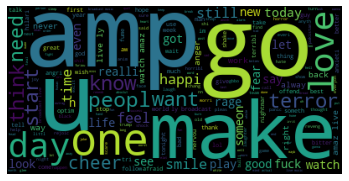

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
!pip install wordcloud
wordcloud = WordCloud().generate(" ".join(corpus))

plt.figure()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Lemmatization

TODO - describe lemmatization process

SyntaxError: invalid syntax (<ipython-input-13-2e1c72876f09>, line 1)

## Bag of Words

TODO - describe bag of words

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus).toarray()

print(X.shape)

(2827, 5434)


In [31]:
print(vectorizer.get_feature_names())

['aa', 'aaa', 'aaron', 'aateam', 'ab', 'abbi', 'aber', 'aberdeen', 'abhijit', 'abil', 'abl', 'abla', 'aboard', 'abort', 'abound', 'abraham', 'abscess', 'absolut', 'absurd', 'abt', 'abund', 'abus', 'abysm', 'academ', 'acapella', 'acc', 'accent', 'accept', 'access', 'accid', 'accidentlyspillbeeronthecarpet', 'accidetli', 'accomplish', 'account', 'accrington', 'accur', 'accus', 'achiev', 'achil', 'acid', 'acount', 'acquir', 'across', 'act', 'action', 'activ', 'activist', 'actor', 'actorslif', 'actual', 'acuff', 'acupunctur', 'ad', 'adamrow', 'adcomm', 'add', 'addair', 'addict', 'addictionnn', 'addit', 'address', 'admin', 'administr', 'admir', 'admit', 'ador', 'adrenalin', 'adult', 'adultingistheworst', 'adventur', 'advert', 'advis', 'advoc', 'aesthet', 'af', 'affair', 'affect', 'afflict', 'afford', 'affront', 'afghanistan', 'aflam', 'aflcatsswan', 'aflfin', 'afp', 'afraid', 'africa', 'afterlif', 'afternoon', 'againnn', 'age', 'agent', 'agg', 'aggrav', 'aggress', 'agin', 'ago', 'agre', 'ah

In [34]:

df_bow_sklearn = pd.DataFrame(X,columns=vectorizer.get_feature_names())
df_bow_sklearn.head()

,aa,aaa,aaron,aateam,ab,abbi,aber,aberdeen,abhijit,abil,...,zephaniah,zero,zeth,zika,zilch,zionist,zombi,zone,zooland,zumba
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## TF-IDF

TODO - describe tf-idf

In [11]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfVectorizer(tokenizer=tokenize, stop_words='english')
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

# Algorithms

TODO - briefly describe overall algorithms

## Naïve Bayes

TODO - describe bayes algorithm

In [14]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, dataset)

predicted = clf.predict(X_train_tfidf)

ValueError: y should be a 1d array, got an array of shape (2827, 2) instead.

## Support Vector Machine (SVM)

TODO - describe svm algorithm

In [ ]:
svm code

## Neural Network

TODO - describe neural networkalgorithm

In [ ]:
NN code